# Code to connect to webcam using Python

__The goal is to implement the model using or webcam__

This is an example of implementing the model to recognize surgical instruments with a webcam.

code base on [nicknochnack](https://github.com/nicknochnack/OpenCV-Basics)

In [68]:
import os 
import cv2 
import matplotlib.pyplot as plt 
%matplotlib inline

In [69]:
# Connect to capture device
cap = cv2.VideoCapture(0) # Use 0 for the default webcam, or the file path for a video

In [70]:
# Get the frame from the capured device
ret, frame = cap.read()

``ret`` Its purpose is to indicate if a frame was successfully read from the video source.
- True: A frame was correctly grabbed from the video source.
- False: There was an error, or the end of the video stream has been reached.

In [71]:
print(ret)

True


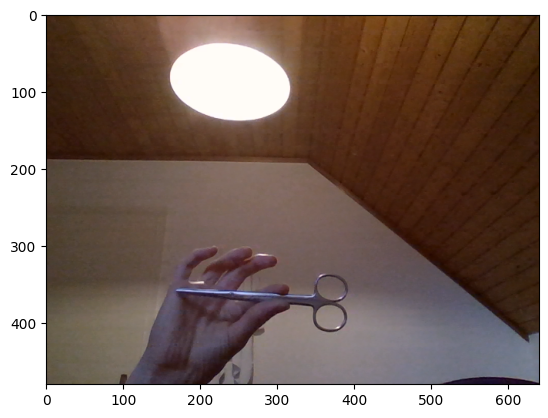

In [72]:
# Convert BGR to RGB
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(frame_rgb)
cap.release()

In [73]:
# Releases the webcam  
cap.release()

**Purpose of the & ``0xFF``:**

- **Compatibility:** In earlier versions of OpenCV, ``cv2.waitKey()`` could return a wider range of values, not just ASCII codes for regular keys. The ``& 0xFF`` effectively masks off the higher-order bits, ensuring the value is compared within the 0-255 range.
- **Handling Special Keys:** Special keys (arrows, function keys, etc.) often have values greater than 255. The mask ensures compatibility when comparing with ASCII codes (like that of ``'q'``). While you lose some information about the specific special key, that might not have been relevant in many older OpenCV application

**Is it Outdated?**

- **Newer OpenCV Versions:** In more recent OpenCV versions, ``cv2.waitKey() ``behaves more predictably for regular key presses. The`` & 0xFF`` is often redundant for basic cases like detecting ``'q'``.
Clarity: While functional, the`` & 0xFF`` might make the code slightly less readable for those unfamiliar with the older behavior.

In [74]:
ord("q")

113

1. ``cv2.waitKey(0)`` will display the window infinitely until any keypress (it is suitable for image display).

2. ``cv2.waitKey(1)`` will display a frame for 1 ms, after which display will be automatically closed. Since the OS has a minimum time between switching threads, the function will not wait exactly 1 ms, it will wait at least 1 ms, depending on what else is running on your computer at that time.

So, if you use ``cv2.waitKey(0)`` you see a still image until you actually press something while for ``cv2.waitKey(1)`` the function will show a frame for at least 1 ms only

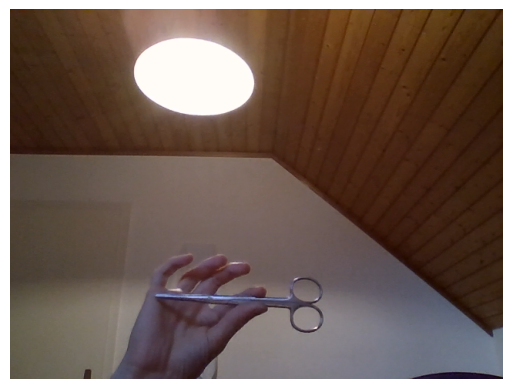

In [75]:
# Connect to webcam
cap = cv2.VideoCapture(0)

# Loop through every frame until we close our webcam
while cap.isOpened():
    ret, frame = cap.read()
    
    # Show image
    cv2.imshow('Webcam', frame)
    
    # Checks whether q has been hit and stops the loop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break 
    
    # Checks whether t has been hit and take a piture and save it
    if cv2.waitKey(1) & 0xFF == ord('t'):
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        plt.imshow(frame_rgb)
        plt.axis('off')
        plt.show()

    
    # ** Note: can be writen: 
   
    """
    if cv2.waitKey(1) == ord('q'):
        break 
    """
# Releases the webcam   
cap.release()
# Close the frame
cv2.destroyAllWindows()
    

## Let's use this code to save a picture in a folder

In [76]:
dir_path = "caputre-images"    
os.makedirs(dir_path, exist_ok=True)

image name: image-1


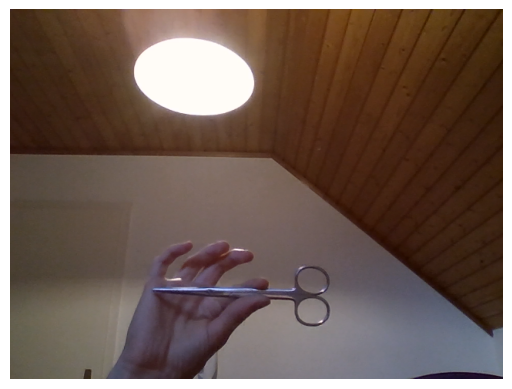

image name: image-2


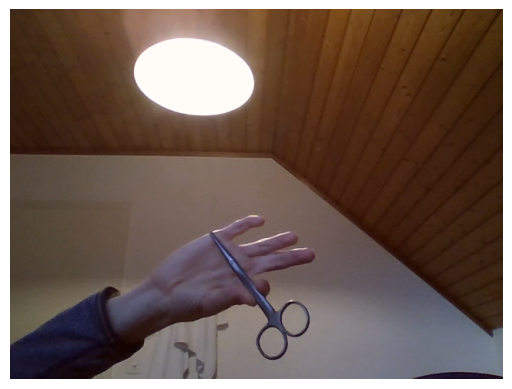

image name: image-3


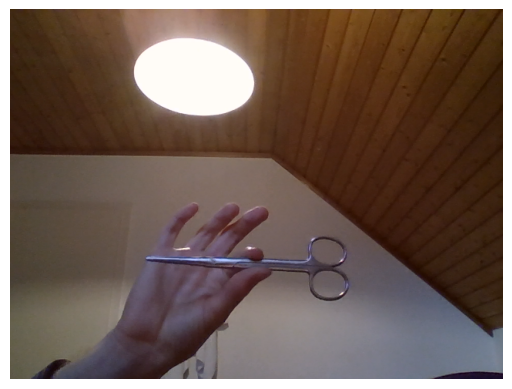

In [77]:
# Function to save image
def save_image(frame, name, path=dir_path):
    img_path = os.path.join(path, name + ".jpg")
    cv2.imwrite(img_path, frame)
    

# Connect to webcam
cap = cv2.VideoCapture(0)
# Loop through every frame until we close our webcam
i = 0 
while cap.isOpened():
  
    ret, frame = cap.read()
    
    # Show webcam 
    cv2.imshow('Webcam', frame)
   
    # Checks whether t has been hit and take a piture and save it
    if cv2.waitKey(1) & 0xFF == ord('t'):
        i += 1
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image_name = "image-" + str(i)
        
        # Show image name
        print(f"image name: {image_name}")
        
        # Show image
        plt.imshow(frame_rgb)
        plt.axis('off')
        plt.show()
        
        # Save image
        save_image(frame, image_name)

    
    # Checks whether q has been hit and stops the loop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break 


# Releases the webcam   
cap.release()
# Close the frame
cv2.destroyAllWindows() 

# Next use webcam and the model to find the instrument name

In [78]:
import tensorflow as tf
import numpy as np 
import pandas as pd
import shutil
from PIL import Image


In [79]:
# load the model
model = tf.keras.models.load_model('model.h5')
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                           

In [80]:
# This is the index of my model
index = {
    0: 'Ciseaux Mayo',
    1: 'Ciseaux Stevens',
    2: 'Ciseaux Stille',
    3: 'Ciseaux micro',
    4: 'Ciseaux à plâtre',
    }

Let's use it.

The model must have images that a normalize 0-1 and the image size must be (1, 224, 224, 3)

image shape :  (224, 224, 3)
new image shape :  (1, 224, 224, 3)


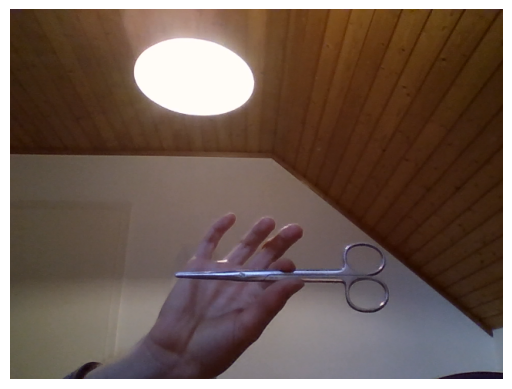

1/1 [==============================] - 1s 670ms/step
The prediction instrument name: Ciseaux Stevens
Prediction percentage: 78%


In [81]:
# Connect to webcam
cap = cv2.VideoCapture(0)

# Loop through every frame until we close our webcam
while cap.isOpened():
    ret, frame = cap.read()
    
    # Show image
    cv2.imshow('Webcam', frame)
    
    # Checks whether q has been hit and stops the loop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break 
    
    # Checks whether t has been hit and take a piture and save it
    if cv2.waitKey(1) & 0xFF == ord('t'):
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # ** Generally normalize images before resizing them to preventing Out-of-Range Values
        # Renormalize to 0-1 range:
        frame_normalized = frame_rgb / 255.0  

        # Resize
        frame_resized = cv2.resize(frame_normalized, (224, 224), interpolation=cv2.INTER_AREA)
        print("image shape : ", frame_resized.shape)
        
        # Add a batch dimension (this is the important step)
        frame_resized = np.expand_dims(frame_resized, axis=0) 
        print("new image shape : ", frame_resized.shape)
    
        # Show image
        plt.imshow(frame_rgb)
        plt.axis('off')
        plt.show()
        
        # Use the model
        predict = model.predict(frame_resized)
        predict_percentage = np.round(predict[0][np.argmax(predict)] * 100)
        
        # Show results
        print(f"The prediction instrument name: {index[np.argmax(predict)]}")
        print("Prediction percentage: {:.0%}".format(np.round(predict[0][np.argmax(predict)], 2)))
        


# Releases the webcam   
cap.release()
# Close the frame
cv2.destroyAllWindows()
    

<!-- check code it's not working !!! -->